Exemplo de aplicação do algoritmo K-means separando documentos por meio da implementação disponível na biblioteca scikit-learn em Python. Foi realizada o agrupamento de letras de música de samba utilizando TF-IDF:

In [ ]:
import pandas as pd
import numpy as np

Obtendo o dataset de letras de samba:

In [ ]:
letras = pd.read_csv('https://github.com/nazareno/palavras-nas-letras/raw/master/letras-ptbr-samba-grande.csv')

In [ ]:
letras.tail(10)

,SName,Lyric,Artist,Songs,Popularity,Genre,Genres
8652,Vai Vadiar,Eu quis te dar um grande amor. Mas você não......,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8653,Vê Se Me Erra,Vê se te manca e vai baixar noutro terreiro. T...,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8654,Verdade,Descobri que te amo demais. Descobri em você m...,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8655,Vida da Gente,O galo canta e a nega me beija. Marmita tá pro...,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8656,Vida da Minha Vida,Vida da minha vida. Lua que encandiou. Uma can...,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8657,Vivo Isolado do Mundo,"Eu vivia,......isolado do mundo. Quando eu era...",Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8658,Vou Procurar Esquecer,Vou procurar um novo amor na minha vida. Porqu...,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8659,Vou Ver Juliana,Quando a mare vazá. Vou vê juliana. Vou vê jul...,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8660,Yaô Cadê A Samba / Outro Recado / Hino,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
8661,"Zeca, Cadê Você?","Ô, Zeca, tu tá morando onde?. Ô, Zeca, tu tá m...",Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...


Utilizando vetor TF-IDF como features:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
v = TfidfVectorizer()
v_text = v.fit_transform(letras['Lyric'])

Observando o valor de K ideal utilizando o método do cotovelo:

In [ ]:
graph = pd.DataFrame(columns = ['k', 'wcss'])
for k in range(1, 17):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(v_text)
  clusters = kmeans.predict(v_text)
  graph = graph.append({'k': k, 'wcss': kmeans.inertia_}, ignore_index=True)

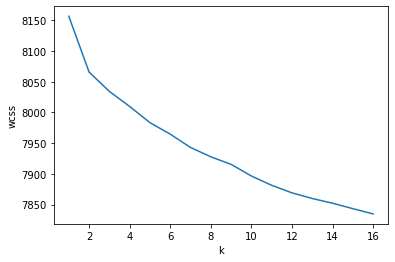

In [ ]:
import matplotlib.pyplot as plt

plt.plot(graph['k'], graph['wcss'])
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

Agrupando as letras com k-means em 8 grupos:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# método de inicialização kmeans++ como padrão
kmeans = KMeans(n_clusters=8)
kmeans.fit(v_text)
clusters = kmeans.predict(v_text)
letras_ag = letras.assign(Cluster = clusters)

letras_ag.sample(10)

,SName,Lyric,Artist,Songs,Popularity,Genre,Genres,Cluster
5378,Os Alquimistas Estão Chegando,ôôôôôôôôôôô. ôôôôôôôôôôô. ôôôôôôôôôôô. Os alqu...,Jorge Ben Jor,256,3.5,Samba,Samba; MPB; Funk; Jovem Guarda; Soul Music; Ro...,6
7649,Xinga Ai,Xinga aí. Pode dizer o que quiser. Vou guardar...,Rodriguinho,106,2.7,Samba,Romântico; Pagode; Samba; Country; Hardcore; T...,1
1297,Vê Se Não Demora,Mandei meu amor embora. E depois mandei voltar...,Arlindo Cruz,201,5.2,Samba,Samba; Pagode; Samba Enredo; Romântico; Axé; R...,5
594,É Demais,É bom deitar com você. E ver nosso desejo manc...,Alcione,374,5.1,Samba,Samba; Romântico; MPB; Pagode; Axé; Bossa Nova...,6
4259,Capaz de Tudo,Pra ganhar teu beijo. Sou capaz de tudo. De mo...,Grupo Revelação,188,13.0,Samba,Pagode; Samba; Romântico; Sertanejo; Samba Enr...,1
6139,Nunca Se Diz Nunca,Nunca vou falar que nunca vou correr atrás. Na...,Maria Rita,140,2.8,Samba,Bossa Nova; Samba; MPB; Pop; Trilha Sonora; Ro...,5
1738,Beija-Flor,Vai beija-flor. Beija a roseira. Faz me lembra...,Beth Carvalho,250,2.6,Samba,Samba; MPB; Pagode; Bossa Nova; Romântico; Axé...,6
5348,Um Dom de Deus,Êôôôôô.... Mensageiro da alegria. Cupido e cau...,Jorge Aragão,168,4.5,Samba,Samba; Pagode; Romântico; MPB; Axé; Velha Guar...,6
3200,Portela na Avenida/Vou Festejar,Portela. Eu nunca vi coisa mais bela. Quando e...,Diogo Nogueira,120,4.1,Samba,Samba; MPB; Romântico; Samba Enredo; Pagode; V...,3
507,40 Anos (Part. Emílio Santiago),São 40 anos de aventuras. Desde que mãe teve a...,Alcione,374,5.1,Samba,Samba; Romântico; MPB; Pagode; Axé; Bossa Nova...,6


Observando algumas letras presentes no cluster 2:

In [ ]:
letras_ag.query('Cluster == 2').sample(15)

,SName,Lyric,Artist,Songs,Popularity,Genre,Genres,Cluster
1953,Brasa Por Cima de Brasa,Ai ai. Meu lado ninguém atrasa. Sim só por que...,Bezerra da Silva,292,2.9,Samba,Pagode; Samba; MPB; Instrumental; Axé; Heavy M...,2
1311,Bom-Bocado,"Ai ai ai ai, ai ai ai ai, Ôh, ôh, ôh ôh. Ai ai...",Art Popular,184,3.2,Samba,Pagode; Samba; Romântico; Dance; Pop; Hip Hop;...,2
7991,Ive Brussel,Você com essa mania sensual ....de sentir e me...,Só Pra Contrariar,157,4.7,Samba,Samba; Pagode; Romântico; Gospel/Religioso; Jo...,2
5402,Apareceu Aparecida,Ai ai ai apareceu Aparecida ai ai ai Aparecida...,Jorge Ben Jor,256,3.5,Samba,Samba; MPB; Funk; Jovem Guarda; Soul Music; Ro...,2
3697,Falando Segredo,Te vejo me olhando. Com jeitinho diferente. De...,ExaltaSamba,238,13.0,Samba,Samba,2
1896,A Semente,Ih Meu Irmão Sujou... Grampearam O Vizinho. O ...,Bezerra da Silva,292,2.9,Samba,Pagode; Samba; MPB; Instrumental; Axé; Heavy M...,2
7979,Eu Vou Fazer Gostoso,Você duvidava que eu ia te pegar de jeito. Mas...,Só Pra Contrariar,157,4.7,Samba,Samba; Pagode; Romântico; Gospel/Religioso; Jo...,2
3291,Peguei um Ita no Norte,. C. Peguei um Ita no norte. Dm. Pra vim pro R...,Dorival Caymmi,89,0.9,Samba,Samba; MPB; Bossa Nova; Black Music; Funk Cari...,2
3678,Ela Entrou Na Dança / Amor ou Amizade,Ela entrou na dança. Ela adorou. Com seu jeito...,ExaltaSamba,238,13.0,Samba,Samba,2
7753,Clima de Estreia,Botei a cara e vou dizer. Botei a cara e vou d...,Samprazer,80,1.5,Samba,Samba; Pagode; Romântico; Axé; Clássico,2


É possível observar pela coluna Lyric que o cluster 2 contém o grupo de letras romanticas. Agora vamos observar o cluster 1:

In [ ]:
letras_ag.query('Cluster == 1').sample(15)

,SName,Lyric,Artist,Songs,Popularity,Genre,Genres,Cluster
5631,Deusa Ou Menina,Essa deusa menina que me alucina. Surgiu dos c...,Katinguelê,137,1.7,Samba,Samba; Pagode; Romântico; Instrumental; Chillo...,1
8301,Louco apaixonado/Fato consumado/Greve de amor,É tão dificil amanhecer. Olhar pro lado e não ...,Turma do Pagode,182,11.7,Samba,Romântico; Pagode; Samba; Sertanejo; Funk Cari...,1
6631,Fidelidade,"Mais de uma vez eu te perdoei,. Mas agora não ...",Nosso Sentimento,101,4.9,Samba,Romântico; Samba; Pagode; Trilha Sonora; Funk;...,1
7361,Preciso Dar Um Tempo,Estou precisando de um tempo pra pensar. Nesse...,Raça Negra,280,14.3,Samba,Romântico; Samba; Pagode; Axé; MPB; Regional; ...,1
7079,Grande Amigo (Acústico) / Cheiro De Amor,"Tá, já sei, não vou insistir. Pelo menos sou u...",Pixote,167,8.8,Samba,Romântico; Samba; Pagode; Trilha Sonora; Funk;...,1
2269,O Amor Chegou,"Quando, olho nos olhos teus. Sinto meu chão su...",Bom Gosto,88,3.0,Samba,Samba,1
899,Beijo Geladinho,"Tô te vendo. Tô sentindo. Tô chorando, tô sorr...",Alexandre Pires,195,6.2,Samba,Samba; Romântico; Pagode; Axé; Dance; Sertanej...,1
7609,Muito Egoísmo,"Já faz um tempo que não estou bem,. Trancado a...",Rodriguinho,106,2.7,Samba,Romântico; Pagode; Samba; Country; Hardcore; T...,1
4163,Eu e O Coração,"Eu, fiz tudo pra dar certo. Fiz tudo direito p...",Grupo Doce Encontro,69,0.9,Samba,Pagode; Samba; Romântico; Trilha Sonora; Pop; ...,1
4858,Amor Demais,"Eu nunca vi nada igual. Perfeita no amor, no a...",Jeito Moleque,99,5.0,Samba,Romântico; Pagode; Samba; Trilha Sonora; Funk ...,1


Este grupo é constituido de letras que falam sobre a vida, algumas sentimentos, etc.

Abaixo um resumo dos artistas mais frequentes em cada grupo:

In [ ]:
for g in range(0, 8):
  print('GRUPO {}:'.format(g))
  print(letras_ag.query('Cluster == {}'.format(g))['Artist'].value_counts()[0:5])
  print('----------\n\n')

GRUPO 0:
Fundo de Quintal    6
Marcelo D2          4
Diogo Nogueira      3
Samprazer           3
Zeca Pagodinho      3
Name: Artist, dtype: int64
----------


GRUPO 1:
Belo           152
Raça Negra     142
ExaltaSamba    113
Pixote          95
Alcione         74
Name: Artist, dtype: int64
----------


GRUPO 2:
Harmonia do Samba    8
Art Popular          7
Dorival Caymmi       7
ExaltaSamba          7
Jorge Ben Jor        6
Name: Artist, dtype: int64
----------


GRUPO 3:
Fundo de Quintal    41
Marcelo D2          26
Beth Carvalho       18
Arlindo Cruz        17
Diogo Nogueira      17
Name: Artist, dtype: int64
----------


GRUPO 4:
Fundo de Quintal    28
Martinho da Vila    15
Reinaldo            13
Katinguelê          11
João Bosco          11
Name: Artist, dtype: int64
----------


GRUPO 5:
Marcelo D2          132
Alcione             122
Zeca Pagodinho       93
Fundo de Quintal     91
Maria Rita           82
Name: Artist, dtype: int64
----------


GRUPO 6:
Chico Buarque       249
Bez